In [13]:
import os
import numpy as np
import pandas as pd
import random
import folium
from folium import plugins
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import IPython
import time
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
data0=pd.read_csv('storms.csv')
display(data0)

,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,1,Amy,1975,6,27,0,27.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
1,2,Amy,1975,6,27,6,28.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
2,3,Amy,1975,6,27,12,29.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
3,4,Amy,1975,6,27,18,30.5,-79.0,tropical depression,NaN,25,1013,NaN,NaN
4,5,Amy,1975,6,28,0,31.5,-78.8,tropical depression,NaN,25,1012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19061,19062,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,NaN,35,1003,60.0,0.0
19062,19063,Wanda,2021,11,7,6,38.1,-36.4,tropical storm,NaN,35,1004,60.0,0.0
19063,19064,Wanda,2021,11,7,12,39.2,-34.9,other low,NaN,35,1006,90.0,0.0
19064,19065,Wanda,2021,11,7,18,40.9,-32.8,other low,NaN,40,1006,90.0,0.0


In [16]:
names=sorted(data0['name'].unique().tolist())
print(names)

['AL011993', 'AL012000', 'AL021992', 'AL021994', 'AL021999', 'AL022000', 'AL022001', 'AL022003', 'AL022006', 'AL031987', 'AL031992', 'AL041991', 'AL042000', 'AL051994', 'AL061988', 'AL061995', 'AL061997', 'AL062003', 'AL071999', 'AL072002', 'AL072003', 'AL081992', 'AL081994', 'AL091994', 'AL092000', 'AL092001', 'AL092003', 'AL101991', 'AL101993', 'AL101994', 'AL102004', 'AL111999', 'AL121991', 'AL121999', 'AL141995', 'AL142002', 'AL142003', 'Al202011', 'Alberto', 'Alex', 'Alicia', 'Allen', 'Allison', 'Alpha', 'Amelia', 'Amy', 'Ana', 'Andrea', 'Andrew', 'Anita', 'Arlene', 'Arthur', 'Babe', 'Barry', 'Belle', 'Bertha', 'Beryl', 'Bess', 'Beta', 'Bill', 'Blanche', 'Bob', 'Bonnie', 'Bret', 'Candice', 'Caroline', 'Cesar', 'Chantal', 'Charley', 'Chris', 'Cindy', 'Clara', 'Claudette', 'Colin', 'Cora', 'Cristobal', 'Danielle', 'Danny', 'David', 'Dean', 'Debby', 'Debra', 'Delta', 'Dennis', 'Diana', 'Dolly', 'Don', 'Dorian', 'Doris', 'Dorothy', 'Dottie', 'Earl', 'Edouard', 'Eight', 'Elena', 'Eleve

In [17]:
df=data0[data0['name']=='Katrina'][data0['year']==2005].reset_index(drop=True)
display(df)

/var/folders/sv/bglz7y716wj30s0hc3c8x8lh0000gn/T/ipykernel_18382/2660650651.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=data0[data0['name']=='Katrina'][data0['year']==2005].reset_index(drop=True)


,Unnamed: 0,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,10384,Katrina,2005,8,23,18,23.1,-75.1,tropical depression,NaN,30,1008,0.0,0.0
1,10385,Katrina,2005,8,24,0,23.4,-75.7,tropical depression,NaN,30,1007,0.0,0.0
2,10386,Katrina,2005,8,24,6,23.8,-76.2,tropical depression,NaN,30,1007,0.0,0.0
3,10387,Katrina,2005,8,24,12,24.5,-76.5,tropical storm,NaN,35,1006,60.0,0.0
4,10388,Katrina,2005,8,24,18,25.4,-76.9,tropical storm,NaN,40,1003,60.0,0.0
5,10389,Katrina,2005,8,25,0,26.0,-77.7,tropical storm,NaN,45,1000,60.0,0.0
6,10390,Katrina,2005,8,25,6,26.1,-78.4,tropical storm,NaN,50,997,60.0,0.0
7,10391,Katrina,2005,8,25,12,26.2,-79.0,tropical storm,NaN,55,994,110.0,0.0
8,10392,Katrina,2005,8,25,18,26.2,-79.6,tropical storm,NaN,60,988,130.0,0.0
9,10393,Katrina,2005,8,25,22,26.0,-80.1,hurricane,1.0,70,984,NaN,NaN


In [19]:
fig=make_subplots(specs=[[{"secondary_y":True}]])
fig.add_trace(go.Scatter(x=df.index,y=df['wind'],name='wind'),secondary_y=False,)
fig.add_trace(go.Scatter(x=df.index,y=df['pressure'],name='pressure'),secondary_y=True,)
fig.update_layout(autosize=False,width=700,height=500,title_text="Wind and Pressure")
fig.update_xaxes(title_text='index of 6hr interval')
fig.update_yaxes(title_text="Wind",secondary_y=False)
fig.update_yaxes(title_text="Pressure",secondary_y=True)
fig.show()

In [20]:
dfLL=df[['lat','long']]
latm,longm=dfLL['lat'].mean(),dfLL['long'].mean()
eq_map = folium.Map(location=[latm,longm],tiles='OpenStreetMap',zoom_start=4.0,min_zoom=2.0)
eq_map.add_child(plugins.HeatMap(dfLL))

for i in range(len(dfLL)-1):
    p1 = dfLL.iloc[i].tolist()
    p2 = dfLL.iloc[i+1].tolist()
    folium.PolyLine([p1, p2], color='red', weight=2.5, opacity=1).add_to(eq_map)
    
eq_map

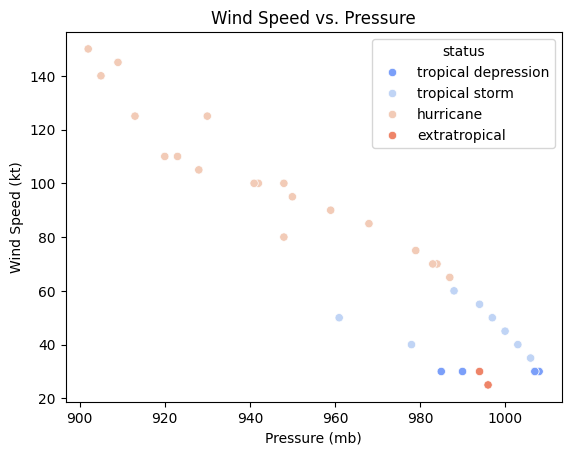

In [21]:
sns.scatterplot(x=df['pressure'], y=df['wind'], hue=df['status'], palette='coolwarm')
plt.title("Wind Speed vs. Pressure")
plt.xlabel("Pressure (mb)")
plt.ylabel("Wind Speed (kt)")
plt.show()


In [26]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(eq_map)

# Adding markers for peak wind and minimum pressure
peak_wind = df.loc[df['wind'].idxmax()]
min_pressure = df.loc[df['pressure'].idxmin()]
folium.Marker([peak_wind['lat'], peak_wind['long']], 
              popup='Peak Wind: {}'.format(peak_wind['wind'])).add_to(marker_cluster)
folium.Marker([min_pressure['lat'], min_pressure['long']], 
              popup='Min Pressure: {}'.format(min_pressure['pressure'])).add_to(marker_cluster)
eq_map  # Display in Jupyter


<Axes: xlabel='pressure', ylabel='wind'>

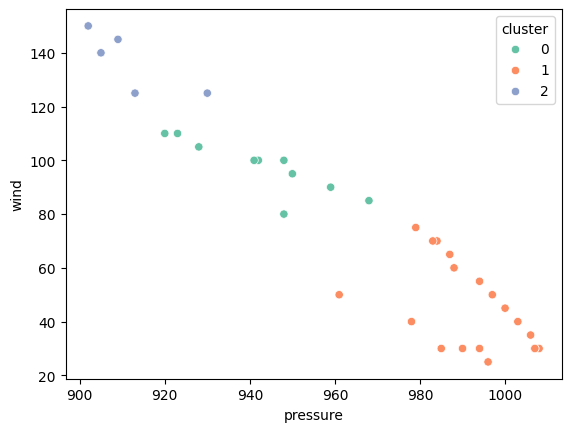

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['wind', 'pressure']])
df['cluster'] = kmeans.labels_
sns.scatterplot(x='pressure', y='wind', hue='cluster', data=df, palette='Set2')


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['pressure']]
y = df['wind']
model.fit(X, y)
df['predicted_wind'] = model.predict(X)


In [39]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
from IPython.display import display, IFrame

# Read data
data0 = pd.read_csv('storms.csv')

# Create datetime column
data0['date'] = pd.to_datetime(
    data0[['year', 'month', 'day', 'hour']].assign(
        hour=data0['hour'].fillna(0).astype(int)
    )
)

# Filterable dropdown widgets
name_filter = widgets.Dropdown(
    options=['All'] + sorted(data0['name'].unique().tolist()),
    value='All',
    description='Storm:',
)

status_filter = widgets.Dropdown(
    options=['All'] + sorted(data0['status'].unique().tolist()),
    value='All',
    description='Status:',
)

# Slider for year filtering
year_slider = widgets.IntRangeSlider(
    value=[data0['year'].min(), data0['year'].max()],
    min=data0['year'].min(),
    max=data0['year'].max(),
    step=1,
    description='Year Range:',
    continuous_update=False,
)

# Function to filter data dynamically
def update_map(name, status, year_range):
    filtered_df = data0.copy()

    # Apply filters
    if name != 'All':
        filtered_df = filtered_df[filtered_df['name'] == name]
    if status != 'All':
        filtered_df = filtered_df[filtered_df['status'] == status]
    filtered_df = filtered_df[(filtered_df['year'] >= year_range[0]) & (filtered_df['year'] <= year_range[1])]

    # If no data after filtering
    if filtered_df.empty:
        print("No data available for the selected filters.")
        return

    # Create map
    latm, longm = filtered_df['lat'].mean(), filtered_df['long'].mean()
    eq_map = folium.Map(location=[latm, longm], tiles='OpenStreetMap', zoom_start=4.0)

    # Add HeatMap
    heat_data = filtered_df[['lat', 'long']].dropna().values.tolist()
    HeatMap(heat_data).add_to(eq_map)

    # Add path (Polyline)
    path = filtered_df[['lat', 'long']].dropna().values
    folium.PolyLine(path, color='blue', weight=2.5, opacity=1).add_to(eq_map)

    # Add markers
    for _, row in filtered_df.iterrows():
        folium.Marker(
            location=[row['lat'], row['long']],
            popup=f"Date: {row['date']}<br>Wind: {row['wind']}<br>Pressure: {row['pressure']}",
        ).add_to(eq_map)

    # Save map as HTML
    map_file = "filtered_hurricane_map.html"
    eq_map.save(map_file)
    display(IFrame(map_file, width=700, height=500))  # Display the saved map in Jupyter

# Interactive output
widgets.interactive(
    update_map,
    name=name_filter,
    status=status_filter,
    year_range=year_slider,
)

# Display widgets
display(name_filter, status_filter, year_slider)
eq_map

Dropdown(description='Storm:', options=('All', 'AL011993', 'AL012000', 'AL021992', 'AL021994', 'AL021999', 'AL…

Dropdown(description='Status:', options=('All', 'disturbance', 'extratropical', 'hurricane', 'other low', 'sub…

IntRangeSlider(value=(1975, 2021), continuous_update=False, description='Year Range:', max=2021, min=1975)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(df['wind'], df['predicted_wind'])
r2 = r2_score(df['wind'], df['predicted_wind'])

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 150.069625159665
R-squared: 0.8921811767031866


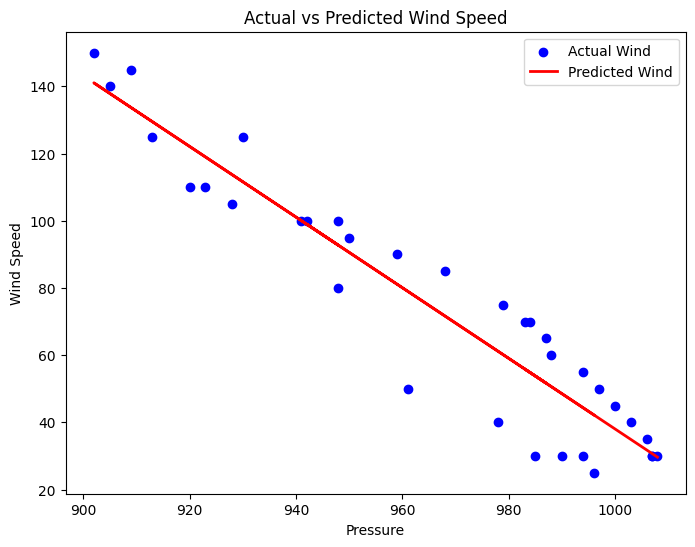

In [45]:
import matplotlib.pyplot as plt

# Plot actual vs predicted wind speed
plt.figure(figsize=(8,6))
plt.scatter(df['pressure'], df['wind'], color='blue', label='Actual Wind')
plt.plot(df['pressure'], df['predicted_wind'], color='red', label='Predicted Wind', linewidth=2)
plt.xlabel('Pressure')
plt.ylabel('Wind Speed')
plt.title('Actual vs Predicted Wind Speed')
plt.legend()
plt.show()


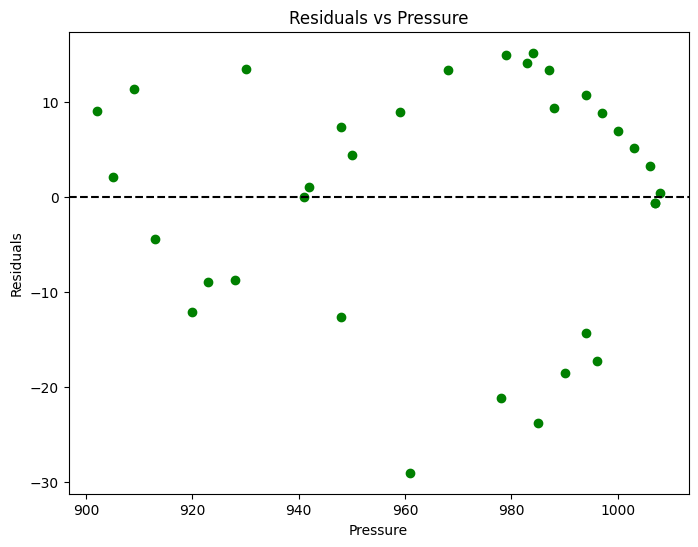

In [46]:
# Plot residuals
df['residuals'] = df['wind'] - df['predicted_wind']
plt.figure(figsize=(8,6))
plt.scatter(df['pressure'], df['residuals'], color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Pressure')
plt.ylabel('Residuals')
plt.title('Residuals vs Pressure')
plt.show()


In [47]:
# Example of new data
new_data = pd.DataFrame({'pressure': [1010, 1005, 1015]})

# Predict wind speed for new data
predicted_winds = model.predict(new_data[['pressure']])
print(predicted_winds)


[27.53632477 32.79101939 22.28163015]


In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df[['pressure']], y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-scores.mean()}")


Cross-validation MSE: 276.378938651634


In [49]:
import joblib

# Save the model
joblib.dump(model, 'hurricane_wind_model.pkl')

# Load the model later
loaded_model = joblib.load('hurricane_wind_model.pkl')


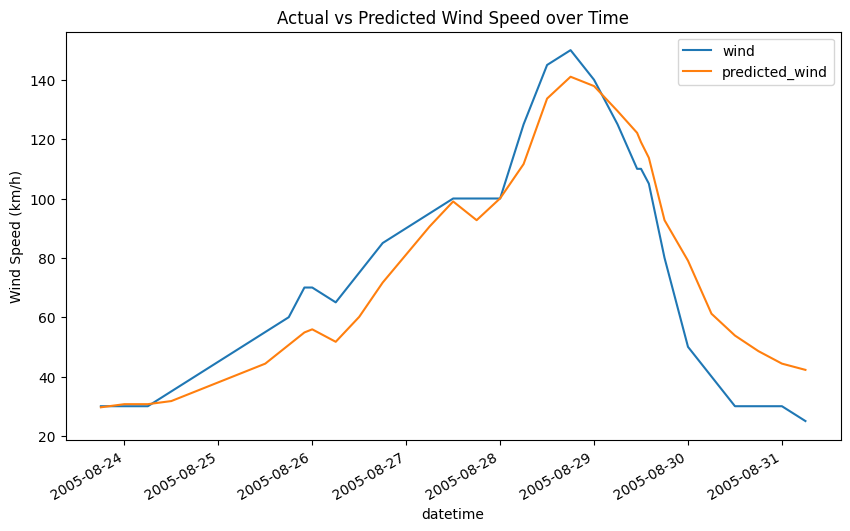

In [57]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)

df[['wind', 'predicted_wind']].plot(figsize=(10, 6))
plt.title("Actual vs Predicted Wind Speed over Time")
plt.ylabel("Wind Speed (km/h)")
plt.show()


In [42]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
import plotly.graph_objects as go
from dash.dependencies import Input, Output

# Read data
data0 = pd.read_csv('storms.csv')

# Convert to datetime
data0['date'] = pd.to_datetime(
    data0[['year', 'month', 'day', 'hour']].assign(
        hour=data0['hour'].fillna(0).astype(int)
    )
)

# Initialize the Dash app
app = dash.Dash(__name__)

# Dropdown for Storm Name
storm_names = sorted(data0['name'].unique().tolist())
storm_dropdown = dcc.Dropdown(
    id='storm-dropdown',
    options=[{'label': name, 'value': name} for name in storm_names],
    value='All',
    style={'width': '50%'}
)

# Dropdown for Hurricane Status
status_dropdown = dcc.Dropdown(
    id='status-dropdown',
    options=[{'label': status, 'value': status} for status in sorted(data0['status'].unique().tolist())],
    value='All',
    style={'width': '50%'}
)

# Create a map layout
app.layout = html.Div([
    html.H1("Atlantic Hurricane Visualization"),
    html.Div([
        html.Label('Select Storm:'),
        storm_dropdown
    ]),
    html.Div([
        html.Label('Select Status:'),
        status_dropdown
    ]),
    dcc.Graph(id='hurricane-map')
])

# Function to update the map based on filters
@app.callback(
    Output('hurricane-map', 'figure'),
    [Input('storm-dropdown', 'value'),
     Input('status-dropdown', 'value')]
)
def update_map(storm, status):
    filtered_df = data0.copy()

    # Apply filters
    if storm != 'All':
        filtered_df = filtered_df[filtered_df['name'] == storm]
    if status != 'All':
        filtered_df = filtered_df[filtered_df['status'] == status]

    # Create the map using Plotly
    fig = go.Figure(go.Scattermapbox(
        lat=filtered_df['lat'],
        lon=filtered_df['long'],
        mode='markers+lines',
        text=filtered_df['name'] + ' - ' + filtered_df['date'].astype(str) + '<br>Status: ' + filtered_df['status'],
        hoverinfo='text',
        marker=dict(
            size=8,
            color=filtered_df['wind'],
            colorscale='Viridis',
            showscale=True,
            opacity=0.7
        ),
        line=dict(width=2, color='blue')
    ))

    # Update layout for the map
    fig.update_layout(
        mapbox=dict(
            style="carto-positron",  # Aesthetic map style
            center={"lat": filtered_df['lat'].mean(), "lon": filtered_df['long'].mean()},
            zoom=5,
        ),
        title="Hurricane Path and Positions",
        height=600,
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
